<a href="https://colab.research.google.com/github/Arledson/data_science/blob/main/Analisando_os_Dados_do_Airbnb_Nova_York.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - Nova York

O [Airbnb](https://www.airbnb.com.br/) é uma das  **maiores empresas hoteleiras da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg">

**Neste *notebook*, iremos analisar os dados referentes à cidade de Nova York, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in New York (good for visualisations).*


In [92]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [93]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2021-12-04/visualisations/listings.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [94]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,2019-11-04,0.33,3,338,0,NaN
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,75,1,409,2021-10-22,4.86,1,194,32,NaN
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2016-06-05,0.52,2,365,0,NaN
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,5,2,2021-08-08,0.02,1,123,1,NaN
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,507,2021-11-08,3.68,1,192,33,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 35847 entradas e 106 variáveis (`listings.csv.gz`).

In [95]:
# identificar o volume de dados do DataFrame
print("Variáveis:\t {}".format(df.shape[0]))
print("Entradas:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Variáveis:	 38277
Entradas:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### *Q2. Tratando os valores ausentes no dataset*


**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas. Abaixo demontraremos as constatações a seguir:

* É possível ver que a coluna `license` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em 25% das linhas.


In [96]:
#verificar variáveis com valores ausentes
df.isnull().sum()

id                                    0
name                                 13
host_id                               0
host_name                            34
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        9504
reviews_per_month                  9504
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           38276
dtype: int64

In [97]:
# remover `license`, pois está vazio
df.drop('license', axis=1, inplace=True)
df.isnull().sum()

id                                   0
name                                13
host_id                              0
host_name                           34
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       9504
reviews_per_month                 9504
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [98]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.248295
last_review                       0.248295
host_name                         0.000888
name                              0.000340
id                                0.000000
minimum_nights                    0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
room_type                         0.000000
price                             0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
number_of_reviews_ltm             0.000000
dtype: float64

In [99]:
# `reviews_per_month` é float. preencher valores ausentes em `reviews_per_month` com a mediana
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].median())

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

last_review                       0.248295
host_name                         0.000888
name                              0.000340
id                                0.000000
minimum_nights                    0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
reviews_per_month                 0.000000
number_of_reviews                 0.000000
room_type                         0.000000
price                             0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
number_of_reviews_ltm             0.000000
dtype: float64

In [100]:
# `last_review` é object, não sendo possivel substituição por mediana. Optei pela remoção.
# remover `last_review`:
df.drop('last_review', axis=1, inplace=True)
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

host_name                         0.000888
name                              0.000340
id                                0.000000
host_id                           0.000000
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
reviews_per_month                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

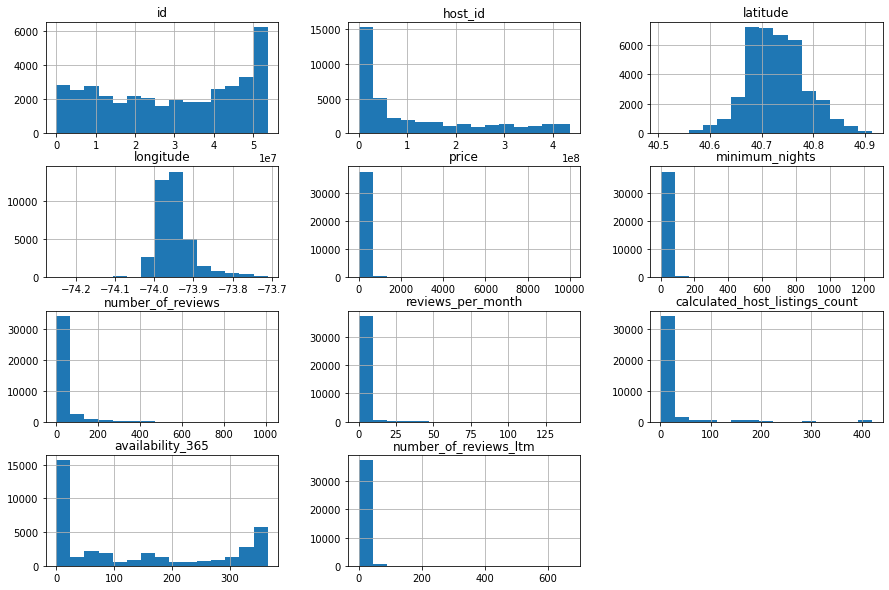

In [101]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distribuição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [102]:
# ver o resumo estatístico das variáveis numéricas
df[["price", "minimum_nights", "number_of_reviews", "reviews_per_month","calculated_host_listings_count", "availability_365", "number_of_reviews_ltm"]].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,38277.000000,38277.000000,38277.000000,38277.000000,38277.000000,38277.000000,38277.000000
mean,170.858714,21.623769,23.302871,1.412880,17.747655,134.290984,5.032160
std,305.100271,29.573333,50.415484,3.852167,59.150451,143.196175,14.693768
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,70.000000,3.000000,1.000000,0.190000,1.000000,0.000000,0.000000
50%,114.000000,30.000000,4.000000,0.480000,1.000000,73.000000,0.000000
75%,189.000000,30.000000,20.000000,1.140000,3.000000,302.000000,3.000000
max,10000.000000,1250.000000,1009.000000,141.000000,421.000000,365.000000,669.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 189, porém seu valor máximo é 10000.
* A variável `number_of_reviews` possui 75% do valor abaixo de 20, porém seu valor máximo é 1009.
* A variável `minimum_nights` possui 75% do valor abaixo de 30, porém seu valor máximo é 1250.

#### Boxplot para minimum_nights


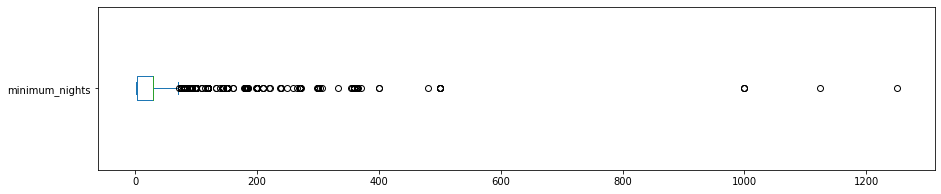

minimum_nights: valores acima de 90:
378 entradas
0.9875%


In [103]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 90 dias para minimum_nights
print("minimum_nights: valores acima de 90:")
print("{} entradas".format(len(df[df.minimum_nights > 90])))
print("{:.4f}%".format((len(df[df.minimum_nights > 90]) / df.shape[0])*100))

#### Boxplot para price

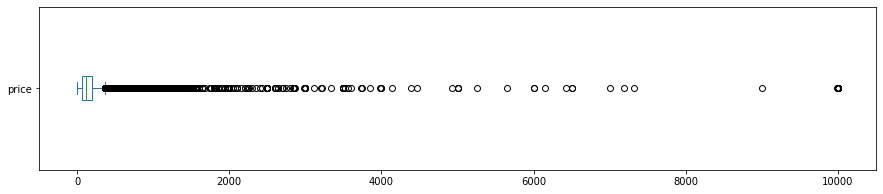


price: valores acima de 1000
347 entradas
0.9065%


In [104]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1000 para price
print("\nprice: valores acima de 1000")
print("{} entradas".format(len(df[df.price > 1000])))
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

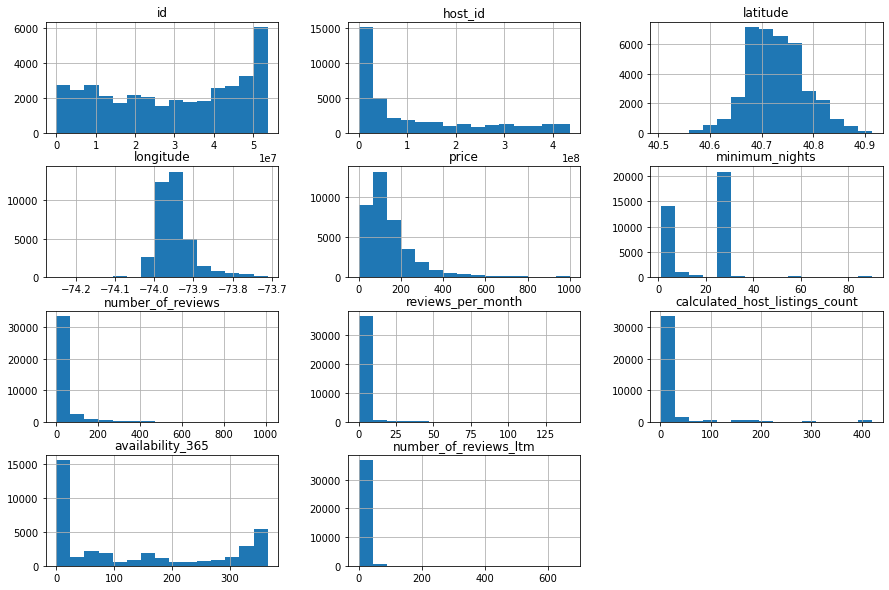

In [105]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 90].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [106]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.151424,-0.034802,0.026609,-0.007859,0.115800
minimum_nights,-0.151424,1.000000,-0.242858,-0.281664,0.185963,-0.122326
number_of_reviews,-0.034802,-0.242858,1.000000,0.300979,-0.108095,0.101495
reviews_per_month,0.026609,-0.281664,0.300979,1.000000,-0.029015,0.112309
calculated_host_listings_count,-0.007859,0.185963,-0.108095,-0.029015,1.000000,0.213338
availability_365,0.115800,-0.122326,0.101495,0.112309,0.213338,1.000000


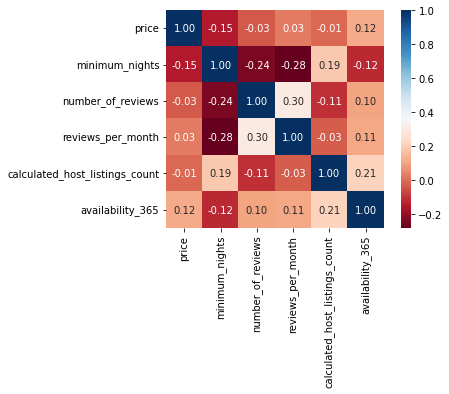

In [107]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.*italicized text*

In [108]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    19965
Private room       16836
Shared room          558
Hotel room           203
Name: room_type, dtype: int64

In [109]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df.shape[0]

Entire home/apt    0.521593
Private room       0.439846
Shared room        0.014578
Hotel room         0.005303
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Nova York?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [110]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Fort Wadsworth        800.000000
Theater District      343.152091
Tribeca               323.796875
Neponsit              295.000000
Midtown               275.924479
Flatiron District     270.895522
SoHo                  265.053719
Navy Yard             263.125000
Financial District    255.535948
NoHo                  242.261905
Name: price, dtype: float64

Acima, vemos que Fort Wadsworth está com média de preço superior a de lugares como Navy Yard, SoHo e NoHo.


Uma pessoa que não conhecesse o Nova York poderia vizualizar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja abaixo quantas entradas há para Fort Wadsworth, que fica em Staten Island.

Porém sabe-se que as localidades mais caras de NY ficam em  Manhattan, em regiões como Theater District e Tribeca. veja também abaixo quantas entradas há para Theater District.

In [111]:
# ver quantidade de imóveis em Fort Wadsworth 
print(df_clean[df.neighbourhood == "Fort Wadsworth"].shape)

# ver a única entrada em Fort Wadsworth 
df_clean[df.neighbourhood == "Fort Wadsworth"]

(1, 16)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
13467,20305160,Beach House Retreat. 15 minutes from Manhattan.,1715301,Mark,Staten Island,Fort Wadsworth,40.59324,-74.0608,Entire home/apt,800,30,0,0.48,6,365,0


In [112]:
# ver quantidade de imóveis em Theater Districth 
print(df_clean[df.neighbourhood == "Theater District"].shape)

# ver as 275 entradas em Theater District 
df_clean[df.neighbourhood == "Theater District"]

(263, 16)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
424,265145,Studio sublet in Hell's kitchen,1390947,Akiko,Manhattan,Theater District,40.762530,-73.983650,Entire home/apt,200,30,8,0.07,1,0,0
508,312415,Cool! Your Own Times Square Room!,1606133,George,Manhattan,Theater District,40.756720,-73.990030,Private room,104,4,59,0.66,1,61,0
852,665394,Winning Location in Hells Kitchen,1139222,Carl,Manhattan,Theater District,40.758440,-73.988190,Entire home/apt,220,31,18,0.17,1,0,0
1163,902599,MODERN LUXURY STUDIO - TIMES SQUARE,1510984,Rj,Manhattan,Theater District,40.762730,-73.983060,Entire home/apt,179,30,14,0.13,1,2,0
1307,1080766,SUMMER Special Price Times Square,5944682,Maja & Pierre,Manhattan,Theater District,40.759460,-73.985190,Private room,148,30,267,2.60,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,53505044,"Roomy Midtown West 1BR w/ Gym & Doorman, near ...",107434423,Blueground,Manhattan,Theater District,40.761969,-73.986173,Entire home/apt,267,31,0,0.48,308,298,0
38077,53587841,Apartments near Times Square 30 Day Stays One ...,377087580,CorpHousing,Manhattan,Theater District,40.760777,-73.986736,Entire home/apt,110,30,0,0.48,49,342,0
38081,53587847,Apartments near Times Square 30 Day Stays Two ...,377087580,CorpHousing,Manhattan,Theater District,40.760613,-73.986513,Entire home/apt,123,30,0,0.48,49,342,0
38084,53587850,Apartments near Times Square 30 Day Stays Two ...,377087580,CorpHousing,Manhattan,Theater District,40.760858,-73.986623,Entire home/apt,123,30,0,0.48,49,342,0


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`. Confirma-se abaixo a concentração de imóveis disponível na região de Manhattan.

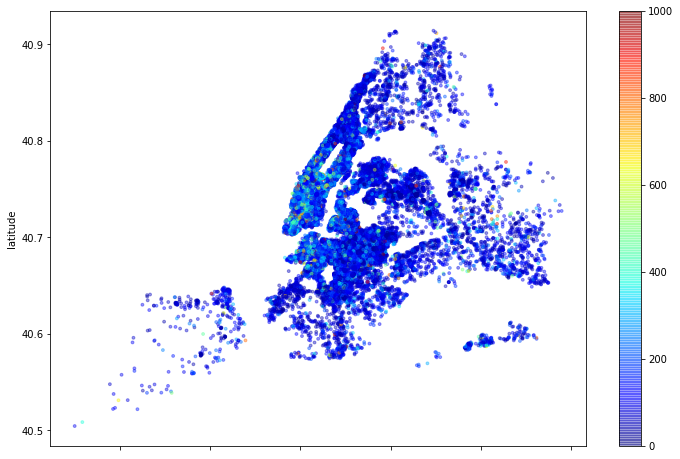

In [113]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este dataset é uma versão resumida,ideal apenas para uma abordagem inicial.